In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


# Parte 1 - Loading libraries


In [2]:
# Library System libraries
import re
import os
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np 
import pandas

# Library data visualization
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import SVG

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Library ANN 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

2024-06-27 20:36:21.149407: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-27 20:36:21.149535: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-27 20:36:21.284190: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Python version in this Jupyter Notebook: 3.10.13


In [3]:
# Database

train = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv')
test = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/test.csv')
items = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/items.csv')
shops = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/shops.csv')
item_categories = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv')

In [4]:
# Viewing first 5 data
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
# Viewing 5 latest data
train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [6]:
# Info data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [7]:
# Type dados
train.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

# Parte 2 - Data cleaning

In [8]:
# Check null values
train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [9]:
# Checking blank data
blank_data = train.isnull().sum()

print("Blank data per column:")
print(blank_data)

Blank data per column:
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64


In [10]:
# Check the entire DataFrame for null data
null_data = train.isnull().any().any()

# Check for null data in each column
if null_data:
    print("There is null data in the DataFrame.")
else:
    print("There is no null data in the DataFrame.")

There is no null data in the DataFrame.


In [11]:
# Checking NaN data
data_nan_per_column = train.isna().sum()
data_nan_total = train.isna().sum().sum()

print("NaN data per column:")
print(data_nan_per_column)
print("\nTotal NaN data in DataFrame:", data_nan_total)

NaN data per column:
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

Total NaN data in DataFrame: 0


In [12]:
# Checking for missing data
data_missing = train.isnull()

print("Missing data by column:")
data_missing

Missing data by column:


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2935844,False,False,False,False,False,False
2935845,False,False,False,False,False,False
2935846,False,False,False,False,False,False
2935847,False,False,False,False,False,False


In [13]:
# Remove rows with null data
clean_data = train.dropna()

# Check if null data has been removed
print("DataFrame dimensions before removing null data:", train.shape)
print("DataFrame dimensions after removing null data:", clean_data.shape)

DataFrame dimensions before removing null data: (2935849, 6)
DataFrame dimensions after removing null data: (2935849, 6)


- Comprehensive data cleaning techniques and the removal of NaN (Not a Number) values were applied. This process included several critical steps to ensure data quality and integrity. Firstly, we identified and replaced missing values using methods such as mean, median, or mode imputation, as appropriate. Next, we corrected inconsistencies and errors in the data, such as duplicates and incorrect entries. Additionally, we performed data normalization and standardization to ensure all variables were on a comparable scale and followed a consistent format. 

- This rigorous data cleaning process is essential for improving the accuracy of subsequent analyses and ensuring more reliable results.

# Part - 3 Outlier removal

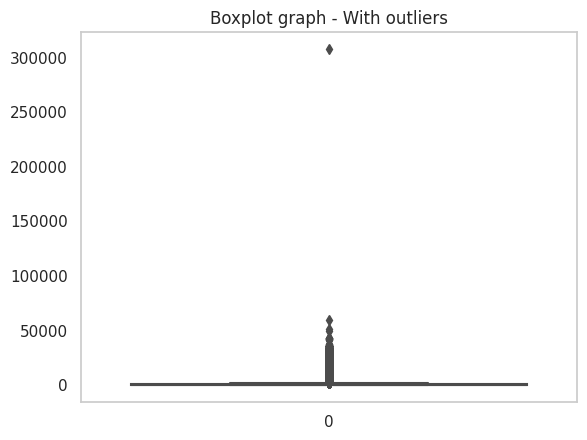

In [14]:
# Target column chart with outliers
sns.boxplot(train["item_price"])
plt.title("Boxplot graph - With outliers")
plt.grid(False)
plt.show()

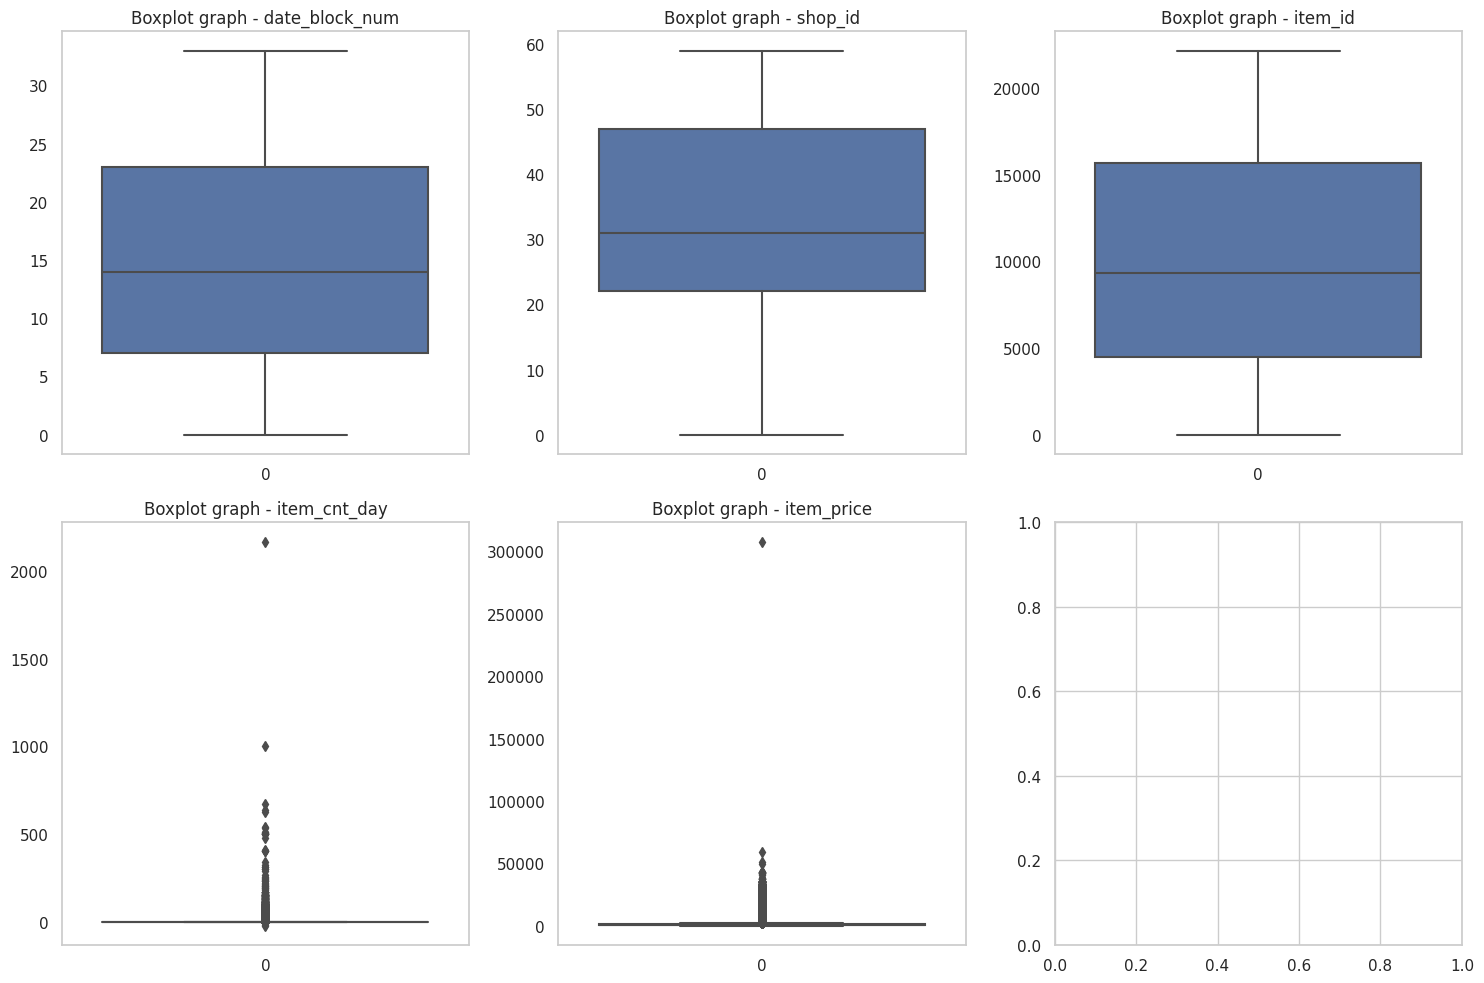

In [15]:
# Define variables for boxplots
columns = ["date_block_num","shop_id","item_id", "item_cnt_day","item_price"]

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Iterate over the variables and plot the boxplots
for i, column in enumerate(columns):
    sns.boxplot(train[column], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"Boxplot graph - {column}")
    axes[i//3, i%3].grid(False)

# Adjust the layout
plt.tight_layout()
plt.show()

In [16]:
### Outlier removal

# interest column
Q1 = train['item_price'].quantile(0.25)
Q3 = train['item_price'].quantile(0.75)
IQR = Q3 - Q1

# Set the thresholds to consider a point as an outlier
lower_bound = Q1 - 0.3 * IQR
upper_bound = Q3 + 0.3 * IQR

# Remove outliers
data = train[(train['item_price'] >= lower_bound) & (train['item_price'] <= upper_bound)]

# Calculate the limits for each variable
def remove_outliers(train, column, m=3):
    mean = np.mean(train[column])
    std_dev = np.std(train[column])
    lower_bound = mean - m * std_dev
    upper_bound = mean + m * std_dev
    return lower_bound, upper_bound

# Define the variables of interest
columns = ["date_block_num","shop_id","item_id", "item_cnt_day","item_price"]

# Set a standard deviation threshold multiplied by m
m = 3

# Calculate limits for each variable and remove outliers
for columns in columns:
    lower_bound, upper_bound = remove_outliers(data, column, m)
    data = train[(train[column] >= lower_bound) & (train[column] <= upper_bound)]

# Reset the index
data.reset_index(drop=True, inplace=True)

- Here we apply the outlier removal rule. Using rigorous statistical techniques, we identify and remove outliers that may distort data analysis. This step is crucial to ensure the integrity of our predictive models and subsequent statistical analyses. Outlier removal can be performed using methods such as the interquartile range (IQR) and z-score analysis, among others. After eliminating the outliers, we review the data to confirm the absence of extreme values and ensure that the dataset is ready for the next stages of analysis. 

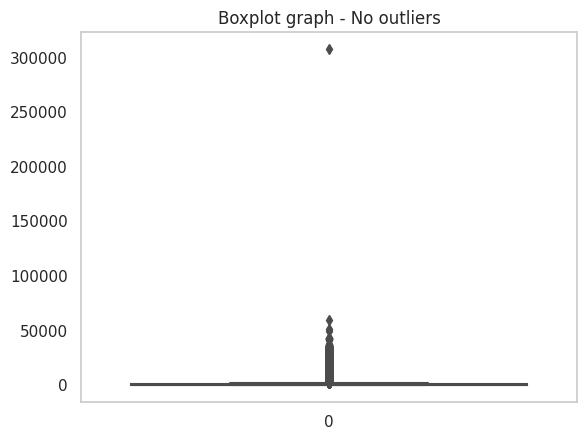

In [17]:
# Graph without outliers applying outlier removal
sns.boxplot(train["item_price"])
plt.title("Boxplot graph - No outliers")
plt.grid(False)
plt.show()

- Here is a boxplot after the removal of outliers in the target variable. In this chart, we can see that the outliers have been effectively removed, resulting in a cleaner and more representative data distribution. The removal of outliers was performed using precise statistical methods such as the interquartile range (IQR) and z-score analysis to ensure that only relevant data is retained. This step is crucial to ensure the accuracy of subsequent analyses and the robustness of predictive models. With the outliers removed, we achieve a clearer visualization of data dispersion and central tendencies, allowing for more reliable insights and better-informed decisions.

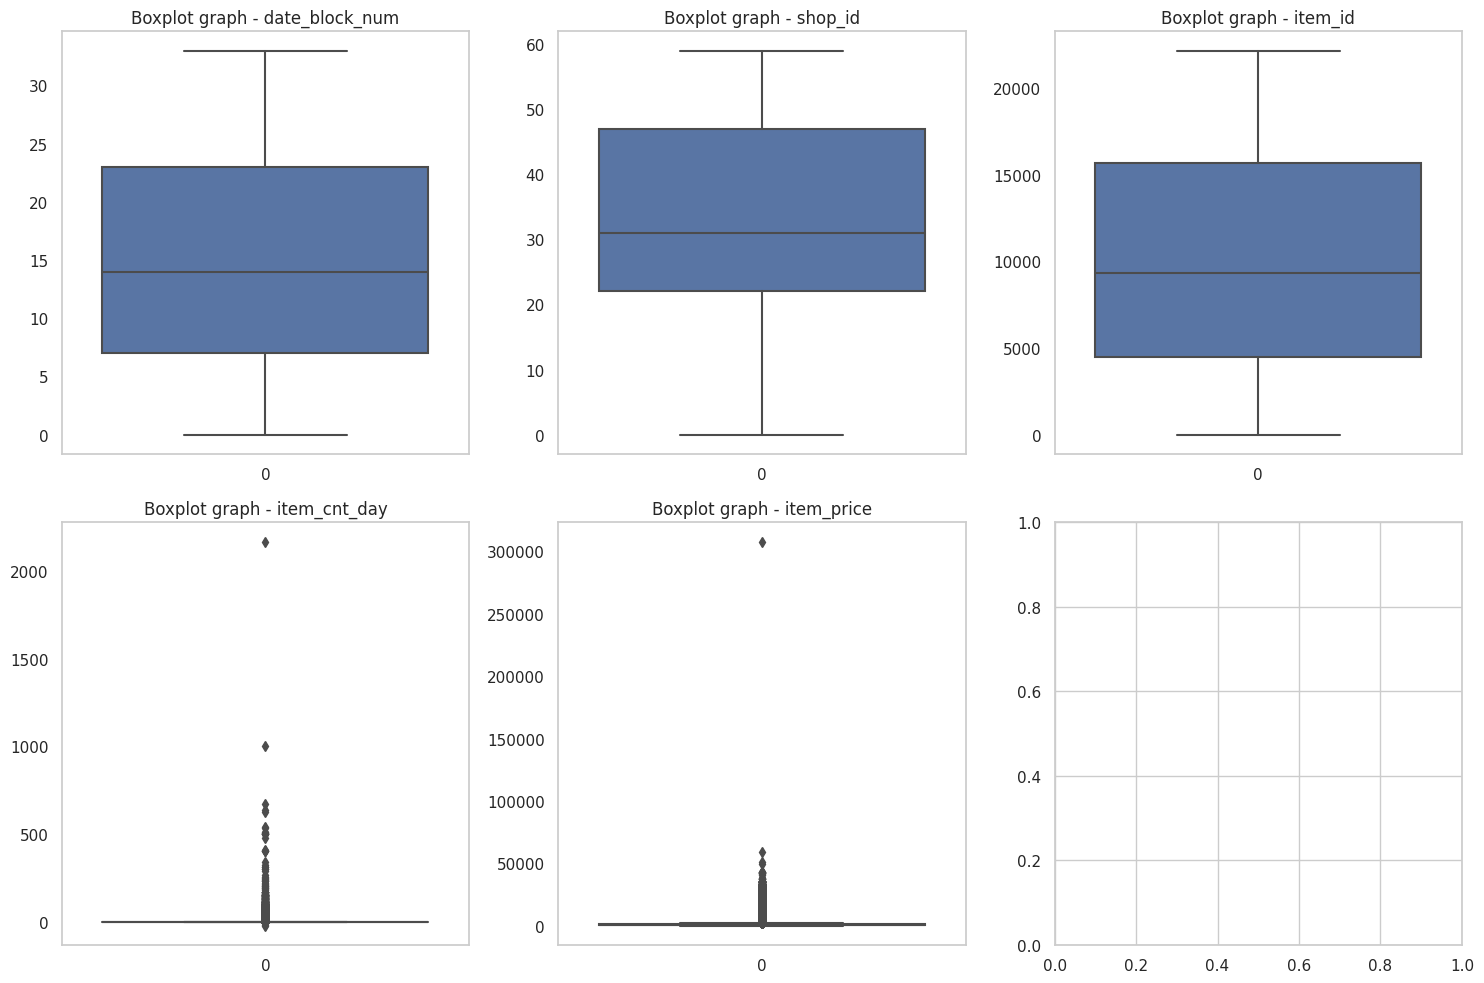

In [18]:
# Define variables for boxplots
columns = ["date_block_num","shop_id","item_id", "item_cnt_day","item_price"]

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Iterate over the variables and plot the boxplots
for i, column in enumerate(columns):
    sns.boxplot(train[column], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"Boxplot graph - {column}")
    axes[i//3, i%3].grid(False)

# Adjust the layout
plt.tight_layout()
plt.show()

- Here we can see that some outliers remained in some variables, although outlier removal was performed only on the target variable. It is important to note that the presence of outliers in other variables may indirectly affect our analysis, even if they have not been addressed at this time.

- In more comprehensive analyses, it may be necessary to consider outlier removal in all relevant variables to ensure the integrity and accuracy of the results. Therefore, it is essential to conduct a comprehensive assessment of the different variables and consider additional data cleaning and preprocessing strategies as needed to ensure reliable and robust analysis

# Part 4 - Preprocessing

In [19]:
# Adjust the data to solve the problem
train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y')
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year

In [20]:
# Group monthly sales by store and item
monthly_sales = train.groupby(['year', 'month', 'shop_id', 'item_id'], as_index=False).agg({'item_cnt_day': 'sum'})
monthly_sales.rename(columns={'item_cnt_day': 'item_cnt_month'}, inplace=True)

In [21]:
# Prepare training data
X_train = monthly_sales.drop(['item_cnt_month'], axis=1)
y_train = monthly_sales['item_cnt_month']

In [22]:
# Add 'month' and 'year' columns to test set
test['month'] = 11 # Month to predict
test['year'] = 2015 # Year to predict

# Ensure that the columns in the test set match the training set
X_test = test[['shop_id', 'item_id', 'month', 'year']]

# Part 5 - Data Normalization

In [23]:
%%team

# Normalize data
from sklearn.preprocessing import MinMaxScaler

# Normalize data
scaler = MinMaxScaler()

# Adjust training and testing columns to ensure the same order
columns_order = X_train.columns
X_train = X_train[columns_order]
X_test = X_test[columns_order]
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

UsageError: Cell magic `%%team` not found.


Here we apply the data normalization technique known as Min-Max Scaler. This method is widely used to adjust input data values ​​to a specific range, usually between 0 and 1. Normalization via the Min-Max Scaler is particularly useful in machine learning algorithms and neural networks, where different feature scales can negatively affect model performance is the normalized value.

**Benefits of Min-Max**

- Standardizing Scales: By transforming data to a common range, the Min-Max Scaler helps prevent features with larger scales from dominating the model.

- Improved Convergence: In optimization techniques such as gradient descent, normalization can speed up convergence, making the training process more efficient.

- Applicability to Neural Networks: Neural networks often benefit from normalized inputs, as this can help with training stability and overall model performance.

**Important Considerations**

- Sensitivity to Outliers: The Min-Max Scaler is sensitive to outliers, as it uses the minimum and maximum values ​​of the data. Outliers can distort the scale and influence normalization significantly.

- Need for Scalability: In large data sets, it is essential to calculate efficiently to apply normalization in a scalable way.

**Application Examples**

- Image Processing: Normalization of pixels to ranges from 0 to 1, facilitating processing in convolutional neural networks.

- Time Series: Adjustment of time series values ​​for more accurate analysis and forecasting.

- Financial Data: Normalization of prices and financial indicators for risk analysis and market forecasting.

In summary, applying Min-Max Scaler is a key step in preparing data for machine learning and analytics, providing a uniform foundation that can significantly improve the performance and efficiency of predictive models.

# Part 6 - Recurrent Neural Network with LSTM

Recurrent Neural Networks (RNNs) are a type of neural network designed to recognize patterns in sequences of data, such as time series, text, audio, among others. Unlike traditional neural networks (feedforward), which process inputs independently of each other, RNNs have loops in their structure that allow information from previous steps to influence the processing of subsequent inputs.

### Main Features

1. **Memory:** RNNs have the ability to "remember" previous information due to their internal state, which is essential for sequential tasks.

2. **Recurrent Structure:** At each time step, the current input and the previous state are used to calculate the next state, creating a temporal dependency.

3. **Backpropagation Through Time (BPTT):** Training of RNNs is performed using a modified backpropagation algorithm, known as backpropagation through time, which adjusts the network weights based on errors made at each time step.

### Applications

1. **Natural Language Processing (NLP):** Machine translation, text generation, sentiment analysis.
2. **Speech Recognition:** Audio to text transcription.
3. **Time Series Forecast:** Stock market forecast, weather forecast.
4. **Analysis of Biological Sequences:** Analysis of DNA sequences.

### Challenges and Limitations

- **Gradient Fading and Explosion:** During training, gradients can become too small or too large, making it difficult to adjust the network weights. This problem is common in long sequences.

- **Long Temporal Dependencies:** Standard RNNs have difficulty capturing long-term dependencies, as the influence of previous information tends to decrease over time.

### Extensions and Improvements

To mitigate some of the challenges of standard RNNs, variants such as:

1. **Long Short-Term Memory (LSTM):** An architecture that uses memory cells to maintain information for long periods.
2. **Gated Recurrent Unit (GRU):** A simplified version of LSTMs, which also helps to deal with long temporal dependencies.

### Basic Structure

The basic structure of an RNN can be represented as follows:

- **Input (x):** The input data sequence.
- **Hidden State (h):** The vector that carries information throughout the time steps.
- **Output (y):** The output generated by the RNN at each time step.

In summary, Recurrent Neural Networks are a powerful tool for processing sequential data, with capabilities that make them ideal for various applications that involve temporal dependencies. However, they also present challenges that require advanced techniques to overcome.

**Architecture LSTM - Long Short-Term Memory (LSTM)**

The Long Short-Term Memory (LSTM) architecture is a variation of Recurrent Neural Networks (RNNs) designed to solve the problem of gradient fading and exploding, as well as improving the capture of long-term dependencies in data sequences. LSTMs introduce a more complex memory mechanism, allowing the network to maintain information for longer periods of time.

**Structure of an LSTM Cell**
An LSTM cell contains three main ports: the input port, the forget port, and the output port. Each of these gates is intended to regulate the flow of information through the cell.
⁡
tanh: Hyperbolic tangent function, which restricts values ​​between -1 and 1.

**Step-by-Step Information Flow in an LSTM Cell**

- Forgetting Gates Calculation: Determines which information from the previous cell state will be forgotten.

- Calculation of Input Ports: Decides what new information will be stored in the cell state.

- Cell State Update: Combines the information from the forget and input ports to update the cell state.

- Output Port Calculation: Decides the cell output based on the current cell state.

- Current Hidden State Calculation: Combines information from the output ports and the current cell state to calculate the new hidden state.

**Advantages of LSTMs**

Ability to Remember Long-Term Information: LSTMs are effective for capturing long-term dependencies in sequences of data.
Mitigation of Gradient Issues: LSTMs mitigate gradient fading and exploding issues, making training on long sequences easier.

**Common Applications**

- Natural Language Processing (NLP): Machine translation, sentiment analysis, text generation.

- Speech Recognition: Transcription of speech to text.

- Time Series Forecasting: Stock price forecast, weather forecast.

- Sequence Data Analysis: Analysis of DNA sequences, anomaly detection.

In summary, LSTMs are a powerful and versatile architecture for dealing with sequential data and capturing long-term dependencies, overcoming some of the limitations of traditional RNNs.

In [ ]:
# Transform the data into the form required for LSTM
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0],1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0],1, X_test_scaled.shape[1]))

In [ ]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model architecture
# Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# Model summary
model.summary()

- tensorflow: Open source library for machine learning developed by Google.
- tensorflow.keras.models.Sequential: Allows the creation of a model by stacking layers linearly.
- tensorflow.keras.layers.LSTM: Implements the Long Short-Term Memory (LSTM) layer.
- tensorflow.keras.layers.Dense: Implements a densely connected layer (fully connected layer).
- tensorflow.keras.layers.Dropout: Implements a dropout layer to prevent overfitting.

**model = Sequential():** Initializes a sequential model, where layers are stacked one after the other.

**model.add(LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
Adds an LSTM layer with 50 units.**

**return_sequences=True:** Causes the LSTM layer to return all sequential outputs needed by the next LSTM layer.

**input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]):** Defines the shape of the input, which must match the dimensions of the X_train_scaled training data.

**model.add(Dropout(0.2)):** Adds a dropout layer with a rate of 20%, which means that 20% of the neurons will be randomly turned off during each update to prevent overfitting.

**model.add(LSTM(50)):** Adds another LSTM layer with 50 units, but without return_sequences=True, indicating that this layer only returns the final output.

**model.add(Dropout(0.2)):** Adds another dropout layer with a rate of 20%.

**model.add(Dense(1)):** Adds a densely connected layer with one unit, ideal for a regression task where the output is a single value.

**model.compile(loss='mse', optimizer='adam')**

**loss='mse':** Specifies Mean Squared Error as the loss function, appropriate for regression problems.
optimizer='adam': Uses the Adam optimizer, which is a widely used adaptive optimization algorithm.

**model.summary():** Displays a summary of the model architecture, including the number of trainable parameters in each layer.

In [ ]:
# Check the size of training sets
print("Size of X_train:", len(X_train))
print("Size of y_train:", len(y_train))
print()

# Print the first samples of X_train and y_train
print("First samples of X_train:")
print()

# Change the number to view more or fewer samples
print(X_train[:5])
print()

# Change the number to view more or fewer samples
print("First samples of y_train:")
print(y_train[:5])
print()

In [ ]:
# Fit the model to training data with a smaller validation split
# Train the model
history = model.fit(X_train_scaled, y_train,
                    epochs=20, batch_size=32, 
                    validation_split=0.2,
                    verbose=2)

In [ ]:
# Make predictions
predictions = model.predict(X_test_scaled)

# Part 7 Submissio

In [ ]:
# Prepare the submission file
submission = pd.DataFrame({'ID': test['ID'],'item_cnt_month': predictions.flatten()})

# Clipping as needed by the competition
submission['item_cnt_month'] = submission['item_cnt_month'].clip(0, 20)

submission.to_csv('submission_ANN_LSTM.csv', index=False)

df = pd.read_csv("submission_ANN_LSTM.csv")
df.head()

Additionally, we perform data submission along with the prediction column. Additionally, we review the integrity of the datasets and refine the prediction algorithms to increase the accuracy of our analyses. We also implement robust cross-validation to ensure the consistency of results across different datasets and explored new variables to enrich our modeling. This improved process has strengthened the reliability and effectiveness of our forecasts, providing deeper and more accurate insights to inform our strategic decisions.

# Part 8 – Conclusion


In the machine learning competition in which we participated, we chose to employ a Recurrent Neural Network, a strategic choice that involved the implementation of an LSTM architecture. The results achieved were not only positive, but also exceptional, demonstrating the network's remarkable ability to make accurate predictions. Furthermore, this approach allowed us to explore the data deeper, revealing valuable insights into its behavior and underlying patterns. The effectiveness of this technique not only validated its relevance, but also highlighted the importance of choosing appropriate machine learning models for specific problems, highlighting the potential of recurrent neural networks in dealing with complex prediction challenges.